In [23]:
from qiskit import QuantumCircuit
from qiskit import QuantumRegister, QuantumCircuit
c = QuantumRegister(1, 'control')
t = QuantumRegister(2, 'target')
cu = QuantumCircuit(c, t, name="Controlled 13^x mod 35")

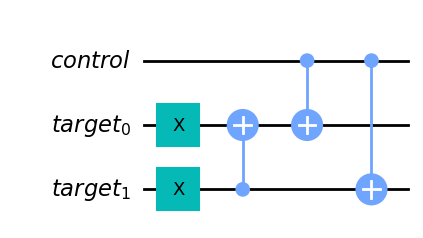

In [24]:
# ESCRIBE TU CÓDIGO ENTRE ESTAS LÍNEAS- INICIO
cu.x(t[0])
cu.x(t[1]) 
cu.cx(t[1], t[0])

# Controlar el circuito
cu.cx(c, t)

# ESCRIBE TU CÓDIGO ENTRE ESTAS LÍNEAS - FIN

cu.draw('mpl')

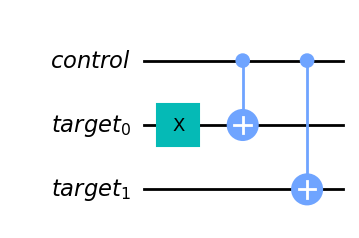

In [25]:
c = QuantumRegister(1, 'control')
t = QuantumRegister(2, 'target')
cu2 = QuantumCircuit(c, t)

# ESCRIBE TU CÓDIGO ENTRE ESTAS LÍNEAS- INICIO
cu2.x(t[0]) 

cu2.cx(c, t)

# ESCRIBE TU CÓDIGO ENTRE ESTAS LÍNEAS - FIN
   
cu2.draw('mpl')

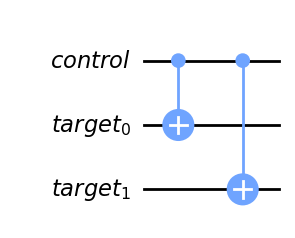

In [27]:
c = QuantumRegister(1, 'control')
t = QuantumRegister(2, 'target')
cu4 = QuantumCircuit(c, t)

# ESCRIBE TU CÓDIGO ENTRE ESTAS LÍNEAS- INICIO
cu4.cx(c, t)

# ESCRIBE TU CÓDIGO ENTRE ESTAS LÍNEAS - FIN

cu4.draw('mpl')